Actividad Pulsar Santiago Aristizabal M 2195475

In [1]:
!git clone https://github.com/sam2800ml/Aprendizaje_Automatico

Cloning into 'Aprendizaje_Automatico'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 78 (delta 29), reused 63 (delta 17), pack-reused 0
Receiving objects: 100% (78/78), 1.56 MiB | 7.88 MiB/s, done.
Resolving deltas: 100% (29/29), done.


#Eda

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
pulsar = "/content/Aprendizaje_Automatico/Datasets/data_pulsars.csv"

In [4]:
df = pd.read_csv(pulsar)

In [5]:
df.head()

Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648                   3.199833   
1                            -0.515088                   1.677258   
2                             1.051164                   3.121237   
3                            -0.636238                   3.642977   
4                             1.123492                   1.178930   

    Standard deviation of the DM-SNR curve  \
0                                19.110426   
1                                14.860146   
2                                21.744669   
3                                20.959280   
4                                11.468720   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.975532                      74.242225   
1                             10.576487                     127.393580   
2                              7.735822                      63.171909   
3                              6.896499                      53.593661   
4                             14.269573                     252.567306   

   target_class  
0             0  
1             0  
2             0  
3             0  
4             0

In [6]:
df['target_class'].value_counts().to_frame()

count
target_class       
0             16259
1              1639

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Del dataset el cual se esta utilizando se observa que no hay datos nulos, por lo que no se debe de hacer un procesamiento para poder eliminarlos, o remplazarlos.

In [8]:
df.describe()

Mean of the integrated profile  \
count                     17898.000000   
mean                        111.079968   
std                          25.652935   
min                           5.812500   
25%                         100.929688   
50%                         115.078125   
75%                         127.085938   
max                         192.617188   

        Standard deviation of the integrated profile  \
count                                   17898.000000   
mean                                       46.549532   
std                                         6.843189   
min                                        24.772042   
25%                                        42.376018   
50%                                        46.947479   
75%                                        51.023202   
max                                        98.778911   

        Excess kurtosis of the integrated profile  \
count                                17898.000000   
mean                                     0.477857   
std                                      1.064040   
min                                     -1.876011   
25%                                      0.027098   
50%                                      0.223240   
75%                                      0.473325   
max                                      8.069522   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
count                         17898.000000               17898.000000   
mean                              1.770279                  12.614400   
std                               6.167913                  29.472897   
min                              -1.791886                   0.213211   
25%                              -0.188572                   1.923077   
50%                               0.198710                   2.801839   
75%                               0.927783                   5.464256   
max                              68.101622                 223.392141   

        Standard deviation of the DM-SNR curve  \
count                             17898.000000   
mean                                 26.326515   
std                                  19.470572   
min                                   7.370432   
25%                                  14.437332   
50%                                  18.461316   
75%                                  28.428104   
max                                 110.642211   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
count                          17898.000000                   17898.000000   
mean                               8.303556                     104.857709   
std                                4.506092                     106.514540   
min                               -3.139270                      -1.976976   
25%                                5.781506                      34.960504   
50%                                8.433515                      83.064556   
75%                               10.702959                     139.309330   
max                               34.539844                    1191.000837   

       target_class  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [9]:
df.duplicated().sum()

0

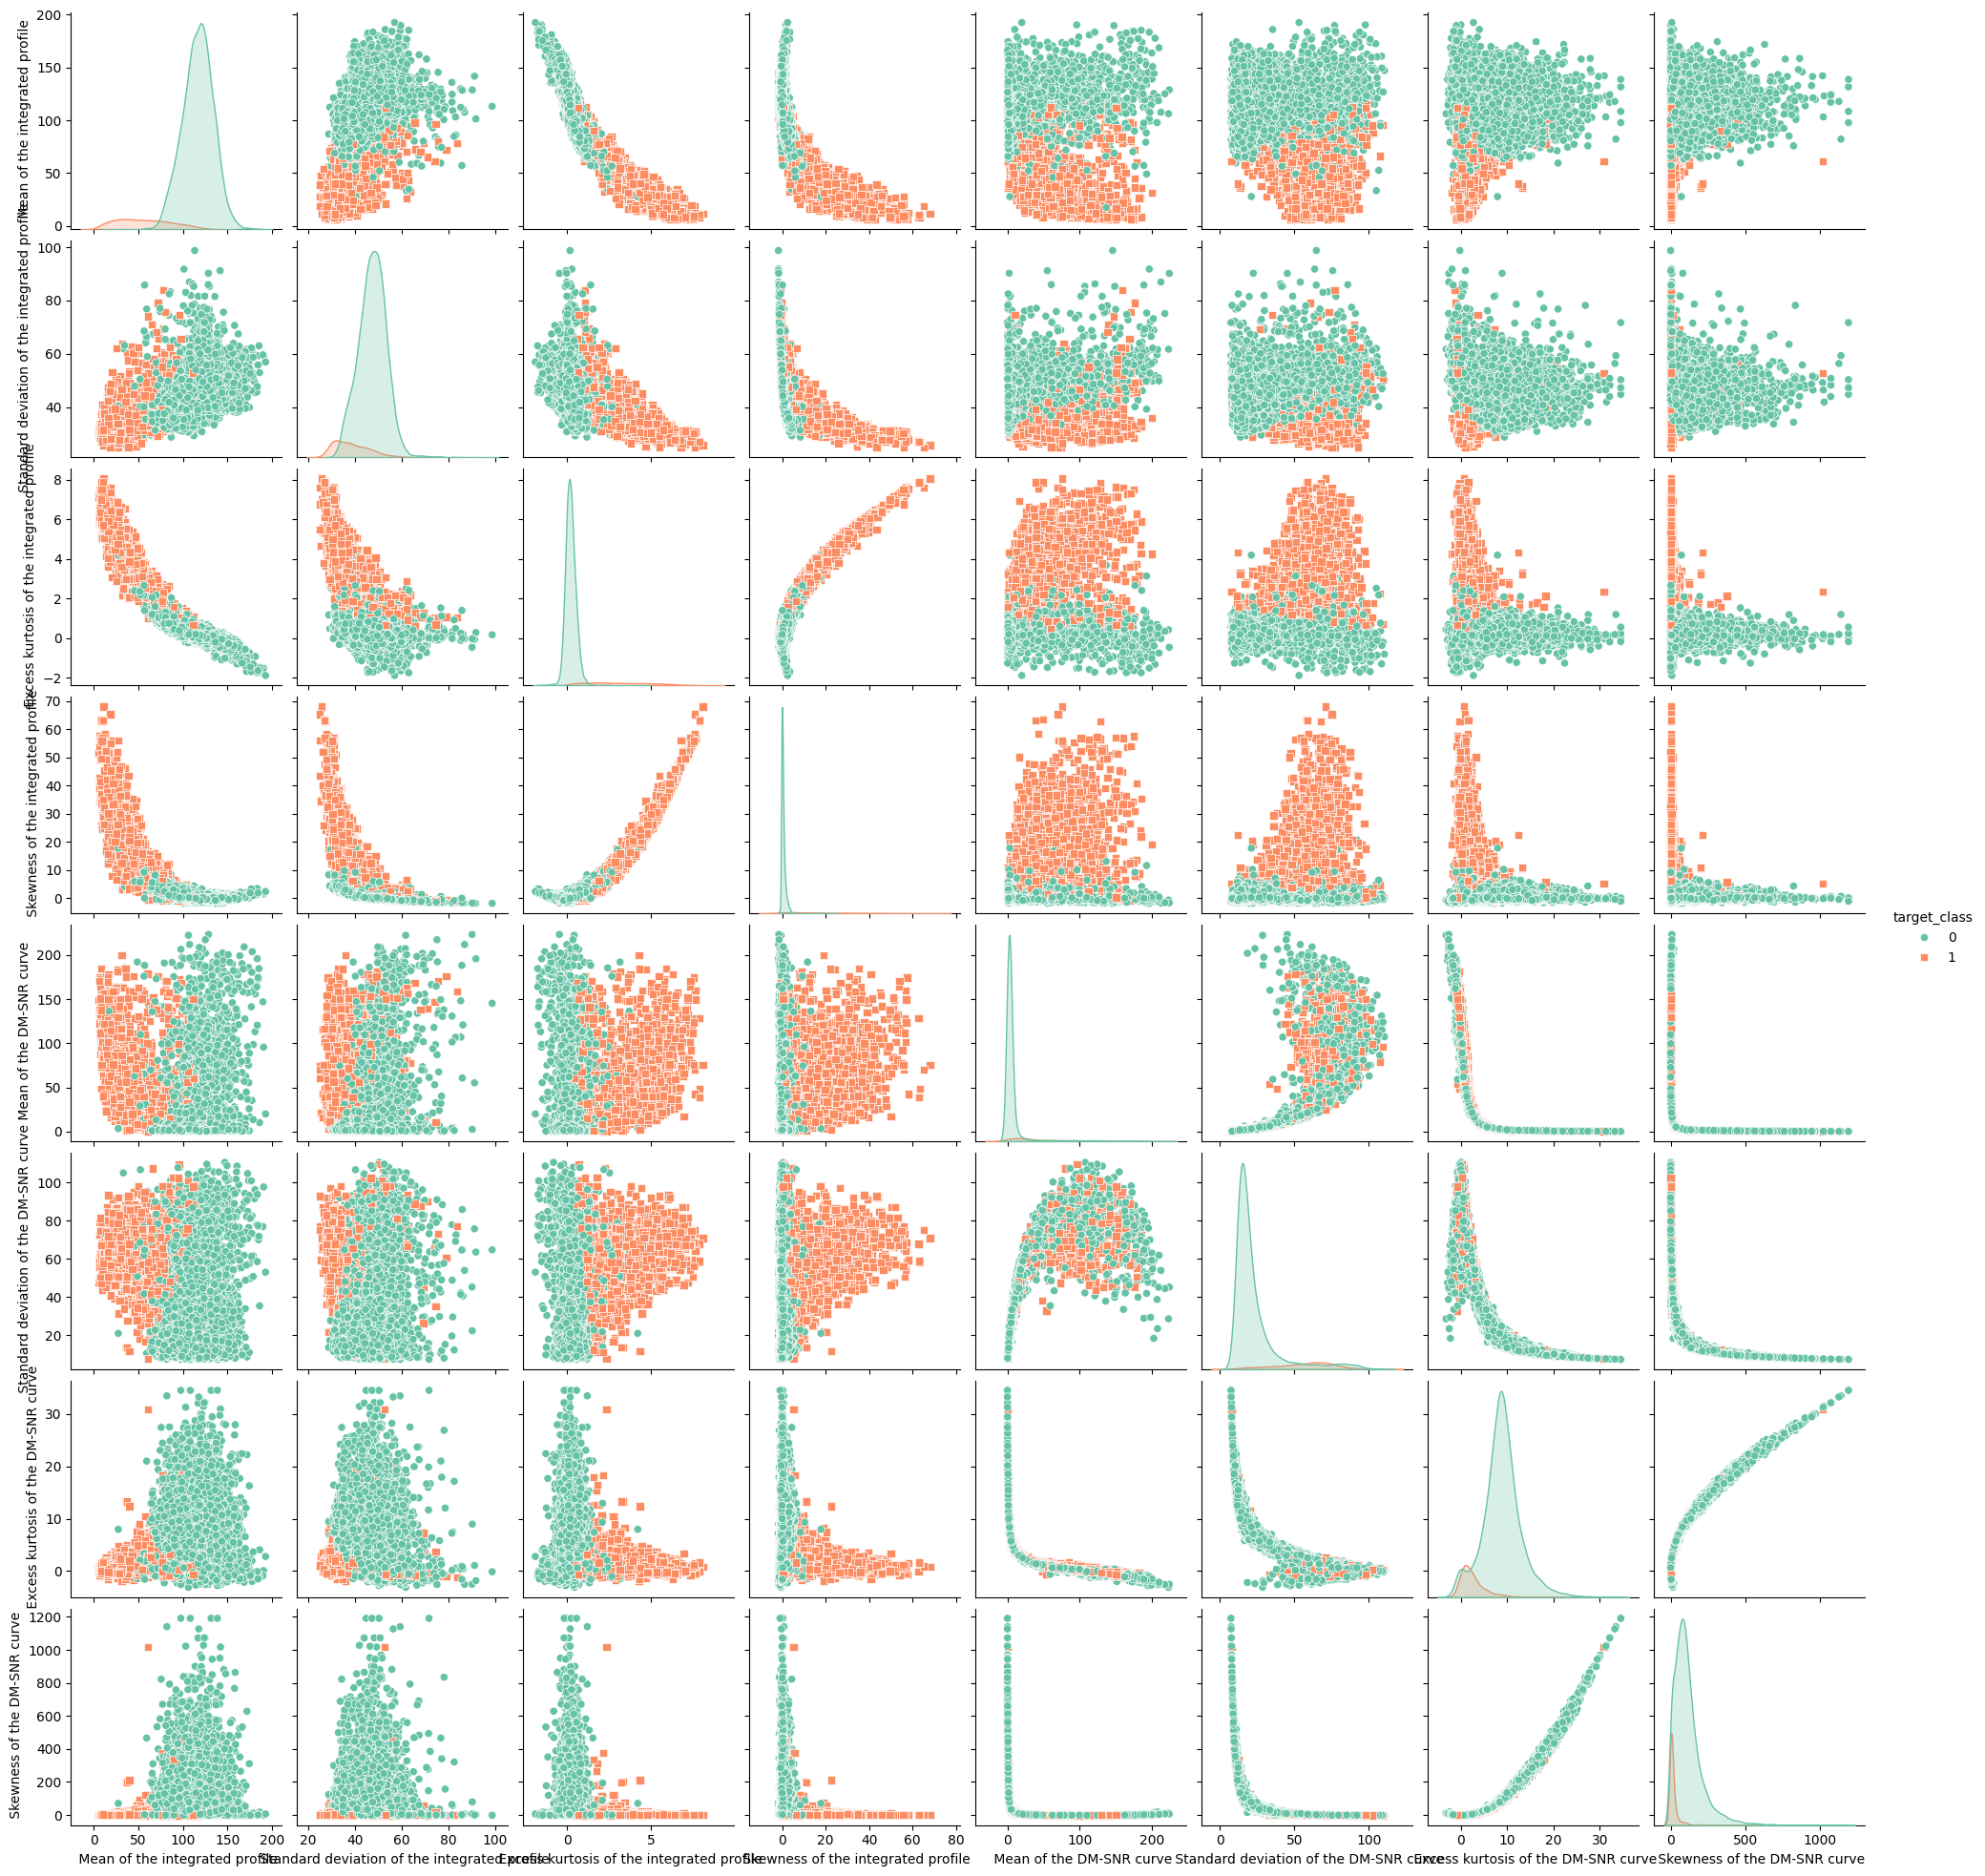

In [10]:
sns.pairplot(df, hue="target_class", markers=["o", "s"], palette="Set2")

Cuando se observa las graficas, se puede ver que hay una diferencia muy grande entre algunas clases con el target por lo que se puede elegir muy sencillo las clases para poder realizar la division, igualmente se usara el desarollo de filtrado de caracteristicas para realizar una seleccion mejor

In [11]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [12]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con esas columnas
cols = [' Mean of the integrated profile', ' Standard deviation of the integrated profile',
        ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile',
        ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve',
        ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
        'target_class']

# Crear un diccionario para mapear los nombres antiguos a los nuevos
new_names = {
    ' Mean of the integrated profile': 'mean_int_prof',
    ' Standard deviation of the integrated profile': 'std_int_prof',
    ' Excess kurtosis of the integrated profile': 'ex_kurt_int_prof',
    ' Skewness of the integrated profile': 'skew_int_prof',
    ' Mean of the DM-SNR curve': 'mean_dm_snr',
    ' Standard deviation of the DM-SNR curve': 'std_dm_snr',
    ' Excess kurtosis of the DM-SNR curve': 'ex_kurt_dm_snr',
    ' Skewness of the DM-SNR curve': 'skew_dm_snr',
    'target_class': 'target_class'
}

# Renombrar las columnas usando el diccionario
df = df.rename(columns=new_names)

# Verificar los nuevos nombres de columnas
print(df.columns)

Index(['mean_int_prof', 'std_int_prof', 'ex_kurt_int_prof', 'skew_int_prof',
       'mean_dm_snr', 'std_dm_snr', 'ex_kurt_dm_snr', 'skew_dm_snr',
       'target_class'],
      dtype='object')


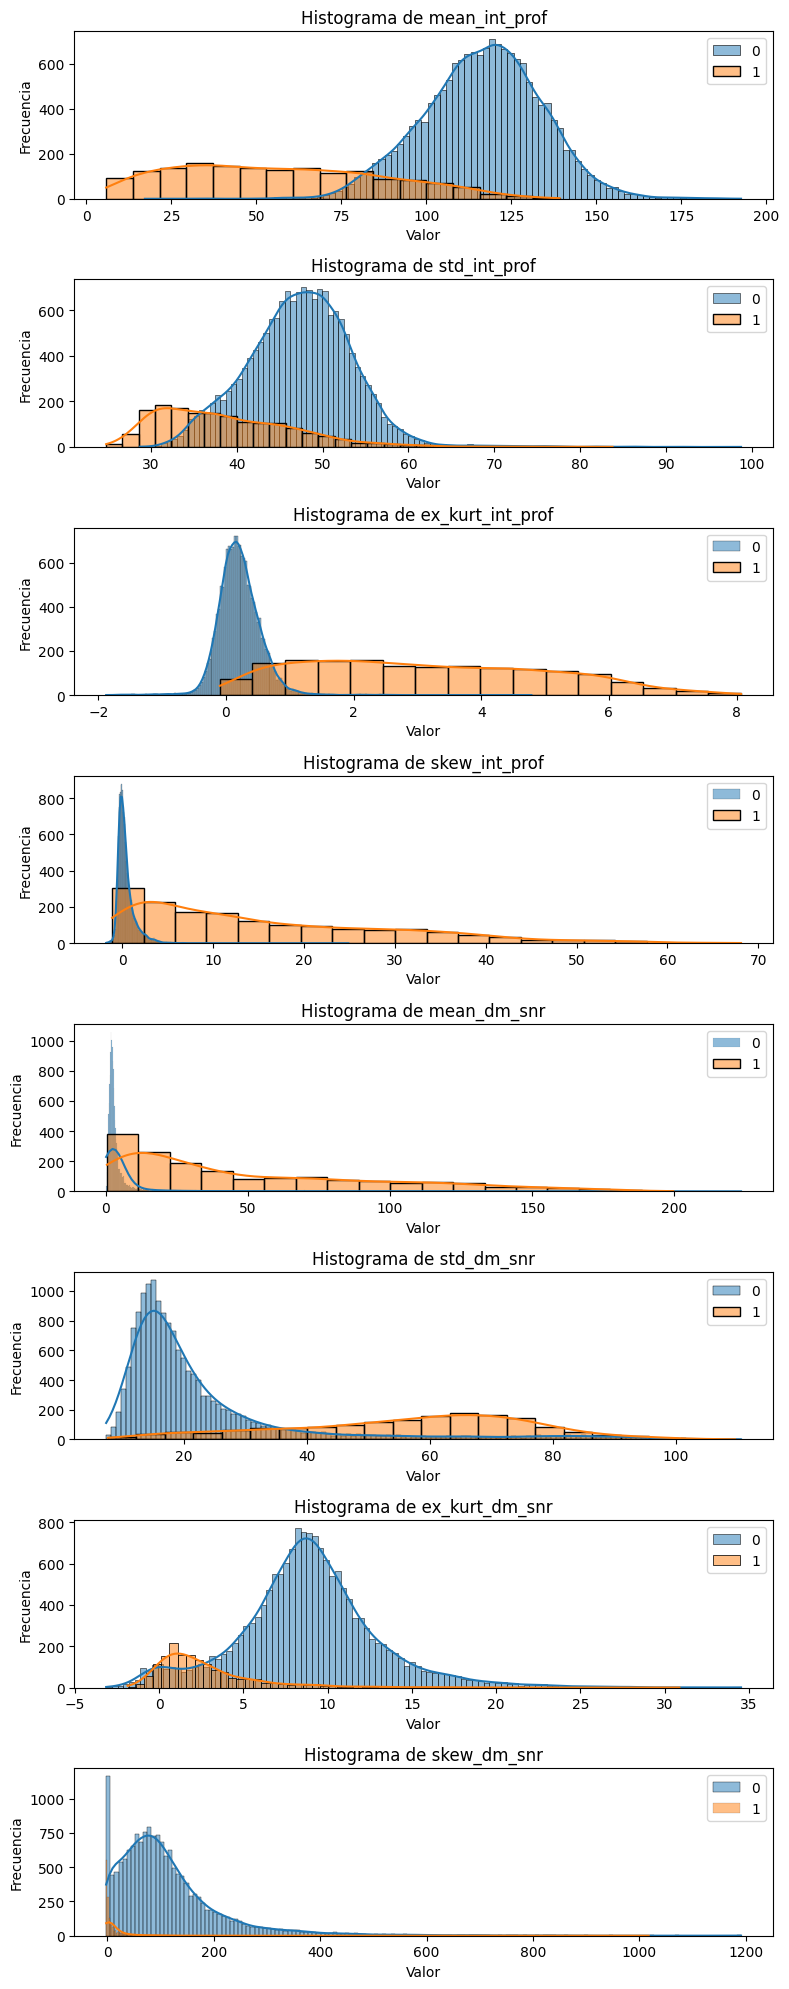

In [13]:

# Crear las figuras y los subplots
fig, axes = plt.subplots(8, 1, figsize=(8, 20))

# Lista de características y clases
features = ['mean_int_prof', 'std_int_prof', 'ex_kurt_int_prof', 'skew_int_prof',
       'mean_dm_snr', 'std_dm_snr', 'ex_kurt_dm_snr', 'skew_dm_snr']
classes = df['target_class'].unique()

# Iterar sobre las características y crear histogramas para cada clase
for i, feature in enumerate(features):
    for cls in classes:
        sns.histplot(df[df['target_class'] == cls][feature], ax=axes[i], label=cls, kde=True)
    axes[i].set_title(f'Histograma de {feature}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar las figuras
plt.show()


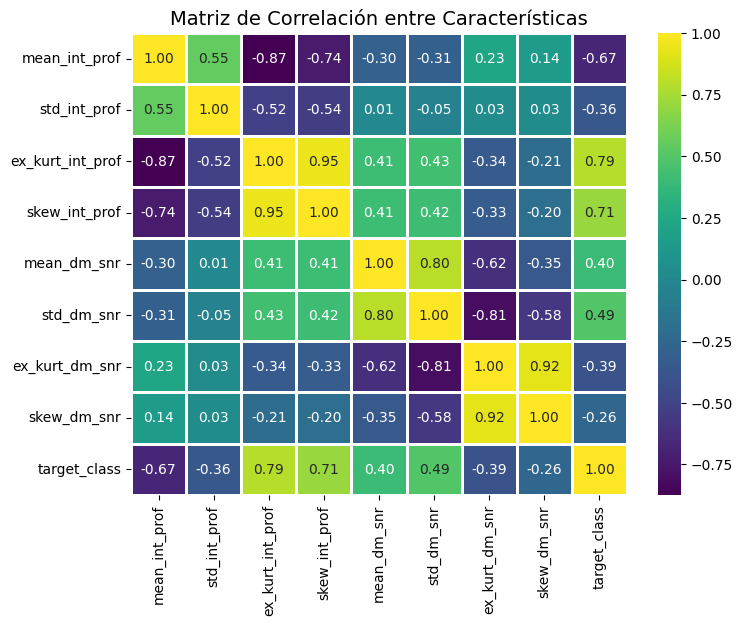

In [14]:
# Seleccionar solo las columnas numéricas para la matriz de correlación


# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear una figura y un eje (subplot) utilizando seaborn
plt.figure(figsize=(8, 6))

# Cambiar el colormap a 'viridis' (otro colormap fresco)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1, linecolor='white')

# Añadir título
plt.title('Matriz de Correlación entre Características', fontsize=14)

# Mostrar la matriz de correlación
plt.show()

En cuanto a la relacion que se observa con la matriz de correlacion, se puede identificar que las dos mejores clases son ex_kurt_int_prof y skew_int_prof, por lo que se usaran esas para la creacion del modelo, y segun la seleccion de las caracteristicas se escogera la mejor caracteristica para la 3

In [15]:
import plotly.graph_objects as go

# Seleccionar las características de interés
features = ['ex_kurt_int_prof', 'skew_int_prof', 'mean_int_prof']

# Filtrar el DataFrame para las características seleccionadas
data = df[features]

# Crear figura tridimensional
fig = go.Figure()

# Agregar un gráfico de dispersión 3D
fig.add_trace(go.Scatter3d(
    x=data['ex_kurt_int_prof'],
    y=data['skew_int_prof'],
    z=data['mean_int_prof'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['target_class'],  # Colorear según la clase Outcome
        colorscale='Viridis',       # Elección del mapa de colores
        opacity=0.8
    ),
    text=df['target_class'],       # Mostrar la clase en el hover
    hoverinfo='text'
))

# Configurar el diseño del gráfico 3D
fig.update_layout(
    scene=dict(
        xaxis_title=' Excess kurtosis of the integrated profile',
        yaxis_title=' Skewness of the integrated profile',
        zaxis_title=' Mean of the integrated profile'
    ),
    margin=dict(l=0, r=0, b=0, t=0)  # Configurar los márgenes
)

# Mostrar el gráfico
fig.show()


#Seleccion de caracteristicas

In [16]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Divide el conjunto de datos en características (X) y la variable objetivo (y)
X = df.drop(columns=['target_class'])
y = df['target_class']

            Feature  Mutual_Info_Score
2  ex_kurt_int_prof           0.226438
3     skew_int_prof           0.194512
0     mean_int_prof           0.191635
5        std_dm_snr           0.119248
7       skew_dm_snr           0.115064
4       mean_dm_snr           0.114846
6    ex_kurt_dm_snr           0.113393
1      std_int_prof           0.088278


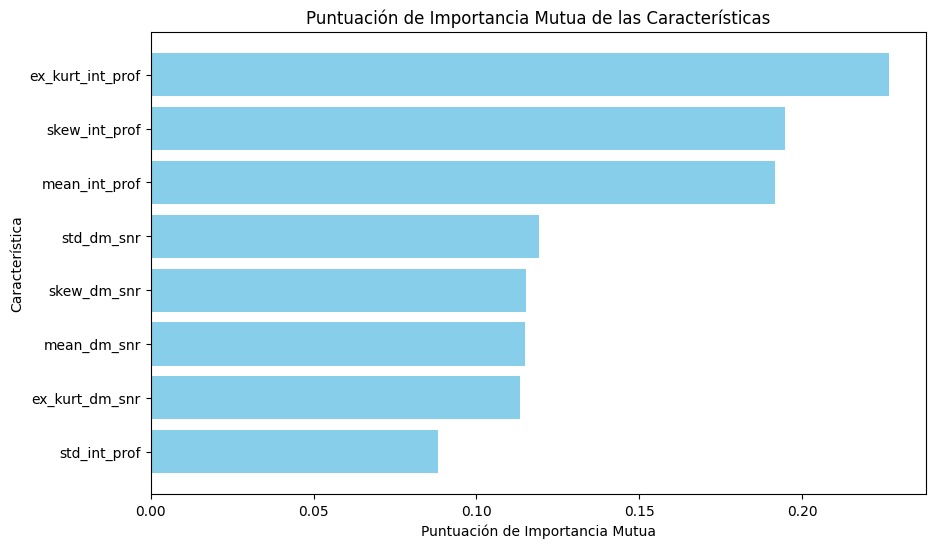

In [17]:
# Calcula la importancia mutua de las características con respecto a la variable objetivo
feature_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Crea un DataFrame para visualizar las puntuaciones de importancia mutua por característica
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Visualiza las puntuaciones de importancia mutua
print(feature_scores_df)

# Gráfica de barras de las puntuaciones de importancia mutua
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df['Feature'], feature_scores_df['Mutual_Info_Score'], color='skyblue')
plt.xlabel('Puntuación de Importancia Mutua')
plt.ylabel('Característica')
plt.title('Puntuación de Importancia Mutua de las Características')
plt.gca().invert_yaxis()  # Invierte el orden de las características para mostrar la más importante en la parte superior
plt.show()

Con la informacion anterior de la matriz se observa que es correcto la seleccion de las 2 primeras caracteristicas y tambien de la 3 que seria mean_int_prof

In [18]:
from scipy.stats import chi2_contingency

# Crear un DataFrame para almacenar los resultados
results_df = pd.DataFrame(columns=['Feature', 'p-value', 'Significativo'])

# Variable objetivo
target_variable = 'target_class'

# Iterar a través de todas las características
for feature in df.columns:
    if feature != target_variable:
        # Evitar comparar la variable objetivo con sí misma
        observed = pd.crosstab(df[feature], df[target_variable])
        chi2, p, dof, expected = chi2_contingency(observed)
        is_significant = p < 0.05

        # Agregar los resultados al DataFrame
        results_df = pd.concat([results_df, pd.DataFrame({'Feature': [feature], 'p-value': [p], 'Significativo': [is_significant]})], ignore_index=True)

# Visualizar la tabla de resultados
print(results_df)

            Feature   p-value Significativo
0     mean_int_prof  0.000000          True
1      std_int_prof  0.483934         False
2  ex_kurt_int_prof  0.494377         False
3     skew_int_prof  0.496486         False
4       mean_dm_snr  0.000000          True
5        std_dm_snr  0.488052         False
6    ex_kurt_dm_snr  0.490160         False
7       skew_dm_snr  0.490160         False


            Feature  Fisher_Score        P-Value
2  ex_kurt_int_prof  30033.327224   0.000000e+00
3     skew_int_prof  18143.230250   0.000000e+00
0     mean_int_prof  14830.932625   0.000000e+00
5        std_dm_snr   5701.255353   0.000000e+00
4       mean_dm_snr   3426.572386   0.000000e+00
6    ex_kurt_dm_snr   3226.140850   0.000000e+00
1      std_int_prof   2728.251495   0.000000e+00
7       skew_dm_snr   1288.044817  1.876808e-272


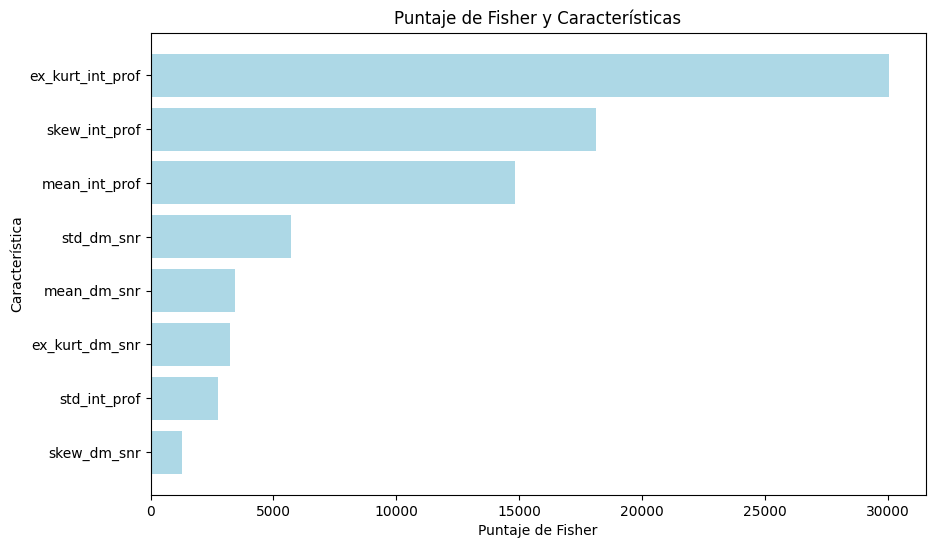

In [19]:
from sklearn.feature_selection import f_classif

# Calcular el puntaje de Fisher
f_scores, p_values = f_classif(X, y)

# Crear un DataFrame para visualizar los puntajes de Fisher
fisher_scores_df = pd.DataFrame({'Feature': X.columns, 'Fisher_Score': f_scores, 'P-Value': p_values})

# Ordenar por puntaje de Fisher en orden descendente
fisher_scores_df = fisher_scores_df.sort_values(by='Fisher_Score', ascending=False)

# Visualizar la tabla de resultados
print(fisher_scores_df)

# Crear una figura y ejes para graficar los puntajes de Fisher
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Barra para todas las características
plt.barh(fisher_scores_df['Feature'], fisher_scores_df['Fisher_Score'], color='lightblue')
plt.xlabel('Puntaje de Fisher')
plt.ylabel('Característica')
plt.title('Puntaje de Fisher y Características')

# Invertir el orden de las características para mostrar la más importante en la parte superior
ax.invert_yaxis()

# Mostrar el gráfico
plt.show()

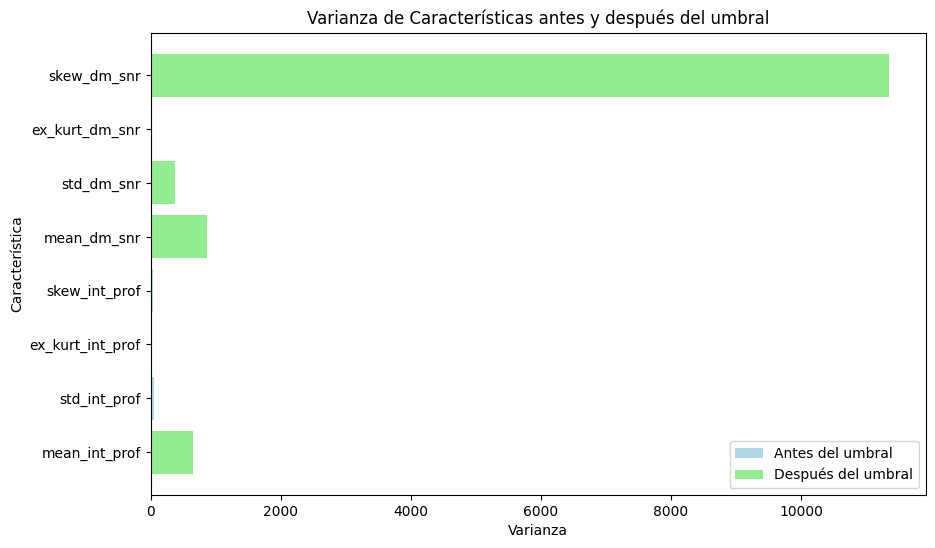

Características seleccionadas:
Index(['mean_int_prof', 'mean_dm_snr', 'std_dm_snr', 'skew_dm_snr'], dtype='object')
Dimensiones del DataFrame con características de alta varianza: (17898, 4)


In [20]:
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

# Calcular la varianza de cada característica antes de aplicar el umbral
variances_before = X.var()

# Crear un objeto VarianceThreshold con un umbral específico (ajusta el valor según tus necesidades)
threshold = 150  # Ejemplo de umbral, puedes ajustarlo
variance_selector = VarianceThreshold(threshold)

# Ajustar el selector a tus datos
X_high_variance = variance_selector.fit_transform(X)

# Obtener las características seleccionadas
selected_features = X.columns[variance_selector.get_support()]

# Calcular la varianza de cada característica después de aplicar el umbral
variances_after = X[selected_features].var()

# Crear un gráfico para comparar la varianza antes y después de aplicar el umbral
plt.figure(figsize=(10, 6))
plt.barh(X.columns, variances_before, color='lightblue', label='Antes del umbral')
plt.barh(selected_features, variances_after, color='lightgreen', label='Después del umbral')
plt.xlabel('Varianza')
plt.ylabel('Característica')
plt.title('Varianza de Características antes y después del umbral')
plt.legend()

# Mostrar el gráfico
plt.show()

# Imprimir las características seleccionadas
print('Características seleccionadas:')
print(selected_features)

# Crear un nuevo DataFrame con las características seleccionadas
df_high_variance = df[selected_features]

# Verificar las dimensiones del nuevo DataFrame
print('Dimensiones del DataFrame con características de alta varianza:', df_high_variance.shape)

#Procesamiento


In [21]:
df.columns

Index(['mean_int_prof', 'std_int_prof', 'ex_kurt_int_prof', 'skew_int_prof',
       'mean_dm_snr', 'std_dm_snr', 'ex_kurt_dm_snr', 'skew_dm_snr',
       'target_class'],
      dtype='object')

In [22]:
X_2 = df.drop(['mean_int_prof', 'std_int_prof',
       'mean_dm_snr', 'std_dm_snr', 'ex_kurt_dm_snr', 'skew_dm_snr',
       'target_class'],axis=1)
y_2 = df["target_class"]

In [23]:
X_2.values

array([[-0.23457141, -0.6996484 ],
       [ 0.46531815, -0.51508791],
       [ 0.32332837,  1.05116443],
       ...,
       [ 0.1593631 , -0.7430254 ],
       [ 0.20116138, -0.02478884],
       [ 1.40639105,  0.08951971]])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)


In [25]:
X_2_scaled

array([[-0.66956953, -0.400459  ],
       [-0.01178476, -0.37053549],
       [-0.14523256, -0.11659286],
       ...,
       [-0.2993338 , -0.40749189],
       [-0.26005007, -0.29104138],
       [ 0.87267394, -0.27250809]])

In [26]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2_scaled, y_2, test_size=0.2, random_state=42,stratify=y)

In [27]:
print(f"X Train: {X_train2.shape}")
print(f"X test: {X_test2.shape}")
print(f"y Train: {y_train2.shape}")
print(f"y test: {y_test2.shape}")

X Train: (14318, 2)
X test: (3580, 2)
y Train: (14318,)
y test: (3580,)


In [28]:
X_train2

array([[ 2.8560395 ,  2.74133854],
       [-0.27301764, -0.25130908],
       [-0.51488965, -0.30648798],
       ...,
       [-0.03791672, -0.20080548],
       [-0.07507673, -0.26036886],
       [ 1.06036168,  0.09599738]])

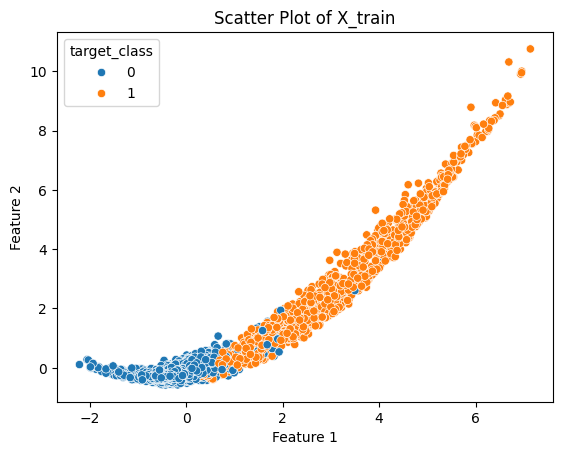

In [29]:
X_train = X_train2.tolist()
X_train_tuples = [(x[0], x[1]) for x in X_train]
# Plot
sns.scatterplot(x=[x[0] for x in X_train_tuples], y=[x[1] for x in X_train_tuples], hue=y_train2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of X_train')
plt.show()


#Perceptron

In [30]:
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.
    |Rw: int
      (Rw; Random weights), Tipo de forma en la cual se generaran el bias y pesos aleatorios.

      Si se usa por defecto 0:

      ** Es un vector que contiene pequeños números aleatorios extraídos de una distribución normal
      con distribución normal y desviación estandar 0.01

      Si se usa 1:

      ** Valores aleatorios en el rango de -25 a +25, asegurándose de que ninguno sea igual a cero
      excepto el primer valor, que es el bias. Los valores que se hubieran generado como cero se reemplazarán
      por valores muy pequeños (0.0001) multiplicados por un factor aleatorio de -1 o 1.
    |Af: String
      (Af;Activation Function), Tipo de función de aprendizaje: step_function o bipolar_step_function.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.
    |w_historical: list
      Almacena todos los valores de bias y pesos obtenidos en cada época:

      [Pesos iniciales, Pesos_iter1, Pesos_inter2,....Pesos_n_iter]

      La dimensión de la lista es: 1 x (1 + n_iter)

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, Af='step_function', Rw=0 , random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.Rw = Rw
        self.Af = Af


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        if(self.Rw == 0):
          self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        elif(self.Rw == 1):
          lower_bound = -25
          upper_bound = 25
          self.w_ = rgen.uniform(low=lower_bound, high=upper_bound, size=1 + X.shape[1])
          # Asegurar que ningún valor sea igual a cero, excepto el primer valor
          self.w_[1:] = np.where(self.w_[1:] == 0, np.random.choice([-1, 1], size=self.w_[1:].shape) * 0.0001, self.w_[1:])
        else:
          print("Error, solo se puede usar 0 o 1.")

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """


        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        Activation_function = self.Af

        """Devolver el valor de predicción final (pasando por la función de activación)"""

        if(Activation_function =='step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, 0)
        elif(Activation_function =='bipolar_step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, -1)
        else:
          print("Error, solo puede ser 'step_function' o 'bipolar_step_function'")

In [76]:
ppn_1 =Perceptron(eta=0.4, n_iter=200, Af='step_function', Rw=1)

In [32]:
ppn_1.fit(X_train2,y_train2)

In [33]:
print(ppn_1.errors_)

[426, 557, 558, 562, 556, 564, 564, 566, 564, 560, 556, 562, 550, 554, 560, 550, 566, 568, 562, 568, 556, 568, 564, 560, 556, 548, 556, 554, 560, 554, 566, 558, 562, 560, 562, 560, 554, 554, 552, 564, 558, 562, 568, 550, 558, 556, 554, 558, 570, 558, 572, 576, 558, 570, 554, 562, 562, 554, 558, 570, 558, 568, 560, 563, 565, 544, 554, 572, 558, 572, 562, 562, 564, 562, 560, 564, 560, 558, 568, 554, 554, 560, 562, 558, 564, 556, 556, 560, 566, 552, 542, 566, 566, 566, 566, 573, 567, 564, 558, 560, 550, 554, 572, 566, 558, 558, 562, 566, 552, 558, 560, 572, 558, 562, 570, 562, 558, 546, 554, 572, 558, 566, 560, 568, 548, 568, 572, 576, 558, 558, 554, 566, 570, 554, 566, 572, 558, 554, 570, 548, 568, 558, 558, 562, 558, 558, 562, 556, 562, 550, 566, 564, 564, 564, 564, 560, 558, 560, 554, 566, 560, 566, 554, 560, 564, 556, 558, 562, 560, 556, 554, 556, 554, 554, 560, 560, 570, 566, 558, 558, 550, 562, 558, 564, 558, 568, 554, 566, 564, 560, 562, 560, 558, 560, 562, 554, 564, 564, 546, 564,

Text(0, 0.5, 'Número de actualizaciones')

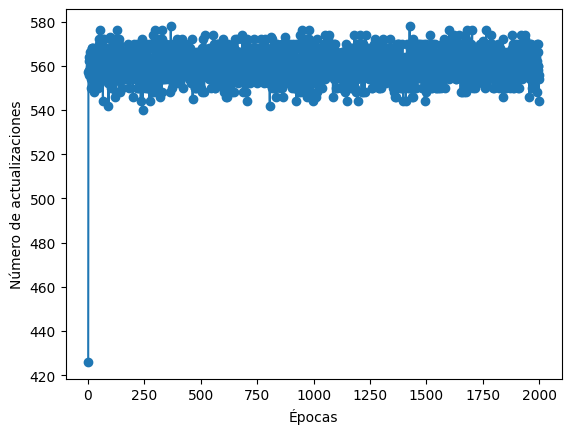

In [34]:
plt.plot(range(1, len(ppn_1.errors_) + 1), ppn_1.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

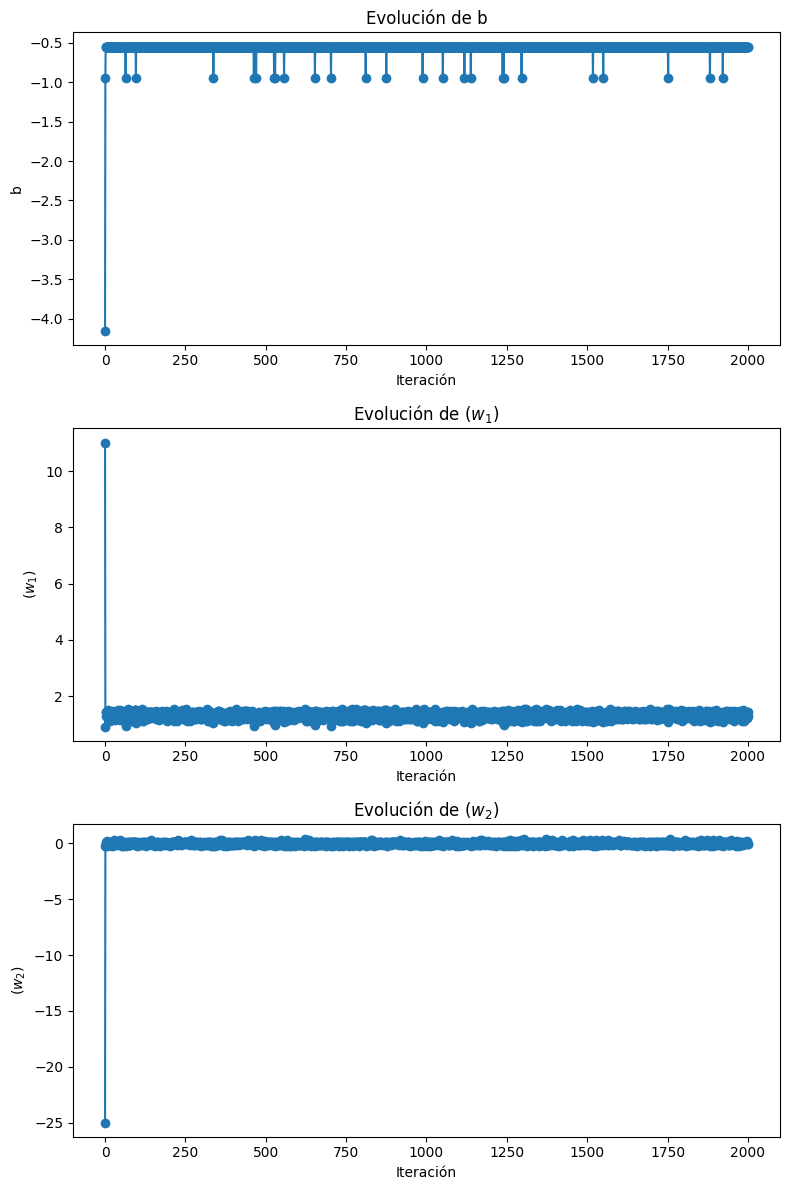

In [35]:
# Lista de etiquetas para los gráficos
labels = ['b', '($w_1$)', '($w_2$)']

# Crear tres subgráficos
fig, axs = plt.subplots(len(labels), 1, figsize=(8, 12))

# Iterar sobre cada etiqueta y crear un gráfico correspondiente
for i, label in enumerate(labels):
    # Extraer la serie temporal para la etiqueta actual
    series = [weights[i] for weights in ppn_1.w_historical]

    # Graficar la serie temporal
    axs[i].plot(range(len(ppn_1.w_historical)), series, marker='o')
    axs[i].set_title(f'Evolución de {label}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel(label)



# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
class metricas_matriz_confusion(object):

  #
    def __init__(self, cm):
        self.TP = cm[1][1]
        self.FP = cm[0][1]
        self.FN = cm[1][0]
        self.TN = cm[0][0]

        self.accuracy = (self.TP+self.TN)/(self.TP+self.FP+self.FN+self.TN)
        self.error_rate = (self.FP+self.FN)/(self.TP+self.FP+self.FN+self.TN)
        self.precision = (self.TP)/(self.TP+self.FP)
        self.recall = (self.TP)/(self.TP+self.FN)
        self.especificity = (self.TN)/(self.TN+self.FP)

In [37]:
y_predictions_ppn_1 = ppn_1.predict(X_test2)

In [39]:
# Calcula la matriz de confusión
cm_ppn_1 = confusion_matrix(y_test2, y_predictions_ppn_1)

print(cm_ppn_1)

[[3199   53]
 [  43  285]]


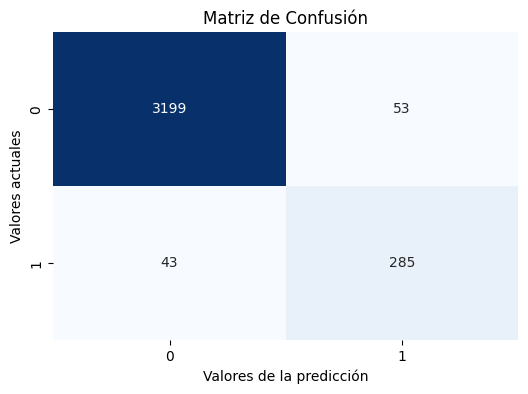

In [40]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_1


            , annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [41]:
metrics_ppn_1 =metricas_matriz_confusion(cm_ppn_1)

In [42]:
print("El valor de exactitud (accuracy) es: " + str(metrics_ppn_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ppn_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ppn_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ppn_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ppn_1.especificity))

El valor de exactitud (accuracy) es: 0.9731843575418995
El valor de tasa de error (error_rate) es: 0.026815642458100558
El valor de precisión (precision) es: 0.8431952662721893
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.8689024390243902
El valor de especificidad (especificity) es: 0.9837023370233703


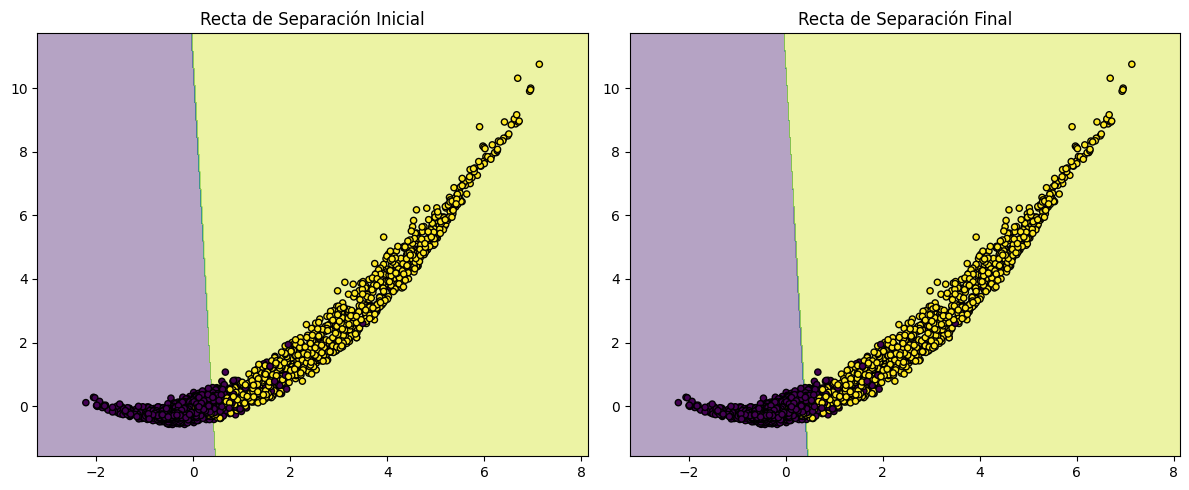

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification



# Función para visualizar la recta de separación en un gráfico existente
def plot_separator(model, X, y, ax, title):
    # Ajustar el modelo al conjunto de datos
    model.fit(X, y)

    # Coeficientes del hiperplano de separación
    w = model.w_[1:]
    b = model.w_[0]

    # Coordenadas para graficar la recta de separación
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar los puntos y la recta de separación
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    ax.plot((-b - w[1] * y_min) / w[0], y_min, color='red', linestyle='--')
    ax.set_title(title)

# Crear datos de ejemplo

# Crear la figura y los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Título para el gráfico de la recta de separación inicial
initial_title = "Recta de Separación Inicial"

# Título para el gráfico de la recta de separación final
final_title = "Recta de Separación Final"

# Crear y graficar el modelo Perceptron para la recta de separación inicial

plot_separator(ppn_1, X_train2, y_train2, axes[0], initial_title)

# Crear y graficar el modelo Perceptron para la recta de separación final

plot_separator(ppn_1, X_train2, y_train2, axes[1], final_title)

# Ajustar los espacios entre subgráficos
plt.tight_layout()
plt.show()



#Adaline

In [43]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |cost_  : list
      Valro de la función de costo de suma de cuadrados en cada época.


    """
    #FUNCIÓN PARA INICIALIZAR MI ADALINE
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Datos de entrenamiento para ajustar.

          Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)


        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):

            #Se calcula la NETA para todos los valores de entrada
            net_input = self.net_input(X)

            #Observe por favor que a continuación se llama a la función de activación
            #Pero en realidad no tiene efecto, se podría colocar directamente:
            #output = self.net_input(X)
            #Pero el propósito es dejar dispuesto el código para usar la función de activación en otros casos.
            output = self.activation(net_input)

            errors = (y - output)

            self.w_[1:] += self.eta * X.T.dot(errors)

            self.w_[0] += self.eta * errors.sum()

            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcula el valor neto (Z)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Función de activación lineal"""
        return X

    def predict(self, X):
        """Retonar el valor de clase perteneciente"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, 0)

In [44]:
ada_1 = AdalineGD(n_iter=2500, eta=0.001)

In [45]:
ada_1.fit(X_train2, y_train2)

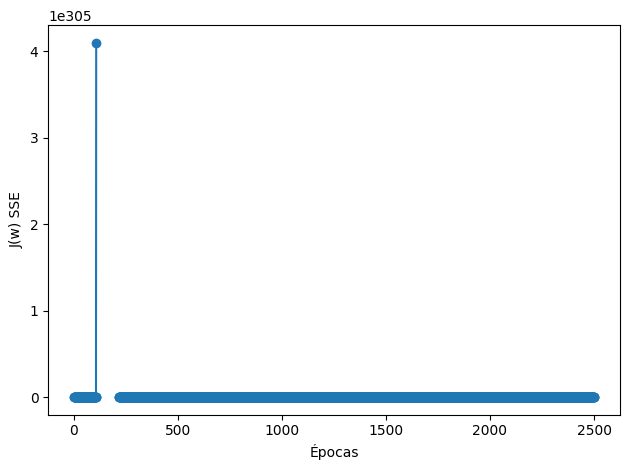

In [46]:
plt.plot(range(1, len(ada_1.cost_) + 1), ada_1.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('J(w) SSE')

plt.tight_layout()

In [47]:
y_predictions_ada_1 = ada_1.predict(X_test2)

In [48]:
# Calcula la matriz de confusión
cm_ada_1 = confusion_matrix(y_test2, y_predictions_ada_1)

print(cm_ada_1)

[[3252    0]
 [ 328    0]]


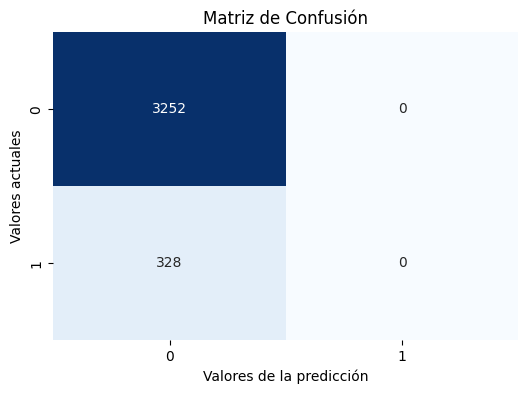

In [49]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [50]:
metrics_ada_1 =metricas_matriz_confusion(cm_ada_1)

<ipython-input-36-2e81a57bdfb1>:13: RuntimeWarning:

invalid value encountered in scalar divide



In [51]:
print("El valor de exactitud (accuracy) es: " + str(metrics_ada_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ada_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ada_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ada_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ada_1.especificity))

El valor de exactitud (accuracy) es: 0.9083798882681564
El valor de tasa de error (error_rate) es: 0.09162011173184358
El valor de precisión (precision) es: nan
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.0
El valor de especificidad (especificity) es: 1.0


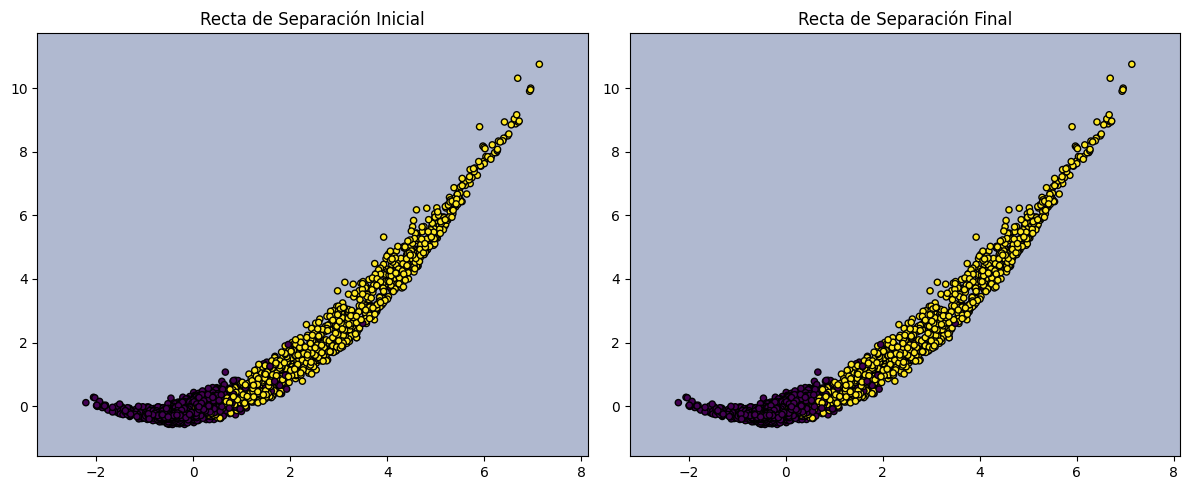

In [78]:
# Función para visualizar la recta de separación en un gráfico existente
def plot_separator(model, X, y, ax, title):
    # Ajustar el modelo al conjunto de datos
    model.fit(X, y)

    # Coeficientes del hiperplano de separación
    w = model.w_[1:]
    b = model.w_[0]

    # Coordenadas para graficar la recta de separación
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar los puntos y la recta de separación
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    ax.plot((-b - w[1] * y_min) / w[0], y_min, color='red', linestyle='--')
    ax.set_title(title)

# Crear datos de ejemplo

# Crear la figura y los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Título para el gráfico de la recta de separación inicial
initial_title = "Recta de Separación Inicial"

# Título para el gráfico de la recta de separación final
final_title = "Recta de Separación Final"

# Crear y graficar el modelo Perceptron para la recta de separación inicial

plot_separator(ada_1, X_train2, y_train2, axes[0], initial_title)

# Crear y graficar el modelo Perceptron para la recta de separación final

plot_separator(ada_1, X_train2, y_train2, axes[1], final_title)

# Ajustar los espacios entre subgráficos
plt.tight_layout()
plt.show()

#Perceptron 3

In [52]:
X_3 = df.drop(['std_int_prof',
       'mean_dm_snr', 'std_dm_snr', 'ex_kurt_dm_snr', 'skew_dm_snr',
       'target_class'],axis=1)
y_2 = df["target_class"]

In [53]:
# Función para normalizar los valores
def normalizar(x, xmax, xmin, ymax, ymin):  # El ymax y ymin son los valores que quiero que queden normalizados (ymax = 1) (ymin = 0)
  m = (ymax-ymin)/(xmax-xmin) # Pendiente
  b = ymin - m*xmin # Tengo elección, si escojo el ymax debo elegir xmax

  y = m*x + b

  return y

In [54]:
max_vals = np.max(X_3, axis=0)
min_vals = np.min(X_3, axis=0)

print(df.columns)
print(min_vals)
print("-"*100)
print(max_vals)

# Ahora puedes utilizar los valores máximo y mínimo para normalizar tu DataFrame
X_norm = normalizar(X_3, max_vals, min_vals, 1, 0)
X_norm.head()

Index(['mean_int_prof', 'std_int_prof', 'ex_kurt_int_prof', 'skew_int_prof',
       'mean_dm_snr', 'std_dm_snr', 'ex_kurt_dm_snr', 'skew_dm_snr',
       'target_class'],
      dtype='object')
mean_int_prof       5.812500
ex_kurt_int_prof   -1.876011
skew_int_prof      -1.791886
dtype: float64
----------------------------------------------------------------------------------------------------
mean_int_prof       192.617188
ex_kurt_int_prof      8.069522
skew_int_prof        68.101622
dtype: float64


mean_int_prof  ex_kurt_int_prof  skew_int_prof
0       0.721342          0.165043       0.015627
1       0.517628          0.235415       0.018268
2       0.520346          0.221138       0.040677
3       0.700933          0.181750       0.016534
4       0.443854          0.249044       0.041712

In [55]:
X_3 = X_3.values

In [56]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_2, test_size=0.2, random_state=42,stratify=y)

In [57]:
ppn_2 =Perceptron(eta=0.4, n_iter=2000, Af='step_function', Rw=1)

In [58]:
ppn_2.fit(X_train3,y_train3)

In [59]:
print(ppn_2.errors_)

[862, 762, 746, 738, 731, 713, 718, 718, 713, 721, 708, 710, 708, 728, 721, 729, 710, 702, 700, 715, 707, 705, 704, 710, 715, 702, 698, 704, 701, 703, 713, 704, 705, 696, 696, 703, 703, 690, 703, 678, 691, 680, 679, 689, 681, 686, 675, 677, 686, 665, 690, 672, 657, 673, 672, 669, 659, 675, 664, 668, 668, 670, 668, 668, 663, 664, 656, 665, 655, 663, 667, 665, 655, 665, 669, 654, 654, 659, 664, 648, 650, 653, 650, 654, 652, 655, 636, 659, 659, 644, 658, 644, 650, 628, 661, 640, 639, 649, 637, 647, 648, 622, 626, 643, 650, 640, 635, 645, 649, 642, 644, 642, 639, 646, 636, 646, 645, 638, 644, 635, 635, 632, 635, 643, 642, 636, 632, 641, 649, 658, 642, 635, 638, 635, 623, 616, 622, 641, 632, 633, 629, 616, 620, 616, 620, 611, 625, 637, 612, 626, 626, 628, 621, 619, 641, 646, 631, 619, 628, 627, 628, 617, 642, 630, 616, 621, 617, 613, 624, 615, 623, 614, 616, 611, 619, 612, 607, 614, 607, 607, 616, 607, 616, 618, 610, 617, 616, 622, 612, 602, 612, 624, 619, 606, 622, 612, 611, 611, 611, 611,

Text(0, 0.5, 'Número de actualizaciones')

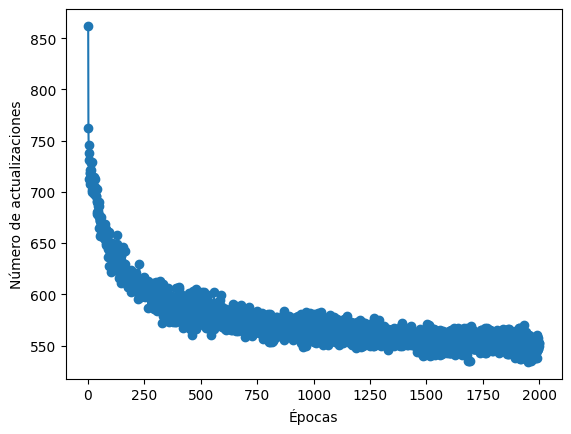

In [60]:
plt.plot(range(1, len(ppn_2.errors_) + 1), ppn_2.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

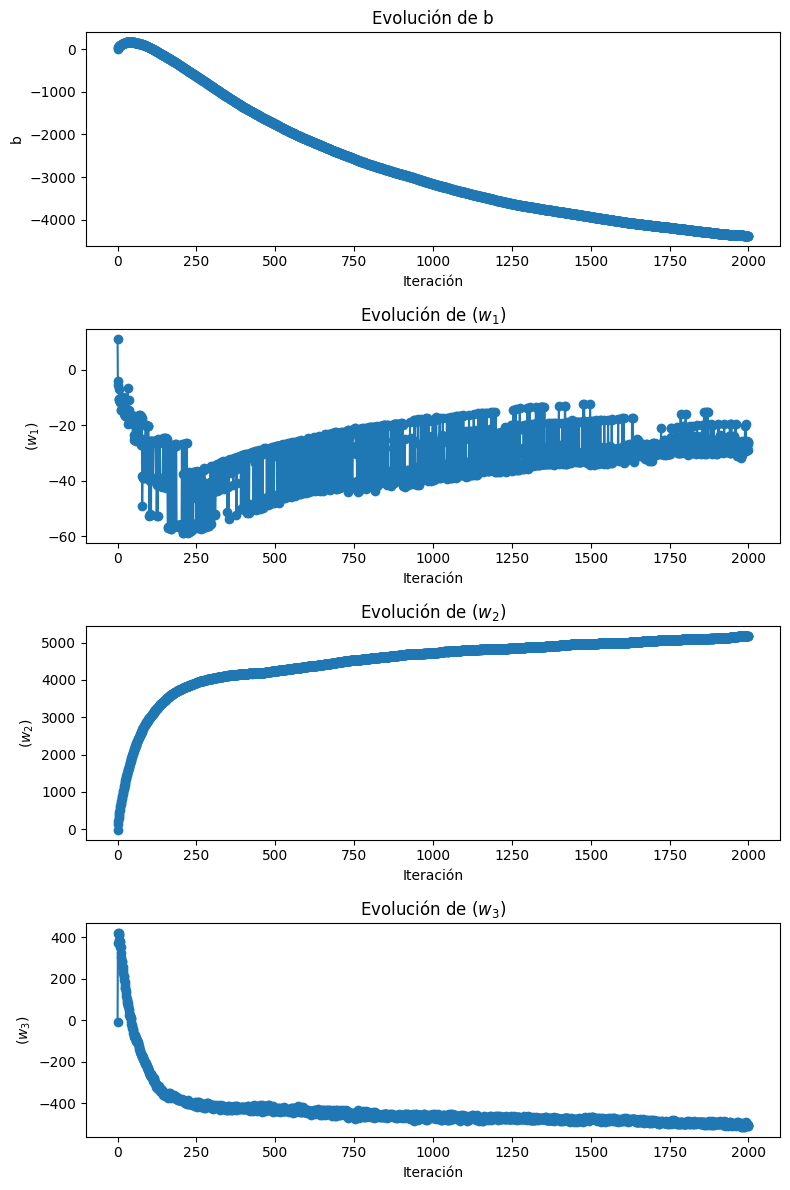

In [61]:
# Lista de etiquetas para los gráficos
labels = ['b', '($w_1$)', '($w_2$)', '($w_3$)']

# Crear tres subgráficos
fig, axs = plt.subplots(len(labels), 1, figsize=(8, 12))

# Iterar sobre cada etiqueta y crear un gráfico correspondiente
for i, label in enumerate(labels):
    # Extraer la serie temporal para la etiqueta actual
    series = [weights[i] for weights in ppn_2.w_historical]

    # Graficar la serie temporal
    axs[i].plot(range(len(ppn_2.w_historical)), series, marker='o')
    axs[i].set_title(f'Evolución de {label}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel(label)



# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [62]:
y_predictions_ppn_2 = ppn_2.predict(X_test3)

In [63]:
from sklearn.metrics import confusion_matrix
class metricas_matriz_confusion(object):

  #
    def __init__(self, cm):
        self.TP = cm[1][1]
        self.FP = cm[0][1]
        self.FN = cm[1][0]
        self.TN = cm[0][0]

        self.accuracy = (self.TP+self.TN)/(self.TP+self.FP+self.FN+self.TN)
        self.error_rate = (self.FP+self.FN)/(self.TP+self.FP+self.FN+self.TN)
        self.precision = (self.TP)/(self.TP+self.FP)
        self.recall = (self.TP)/(self.TP+self.FN)
        self.especificity = (self.TN)/(self.TN+self.FP)

In [64]:
# Calcula la matriz de confusión
cm_ppn_3 = confusion_matrix(y_test3, y_predictions_ppn_2)

print(cm_ppn_3)

[[3247    5]
 [  85  243]]


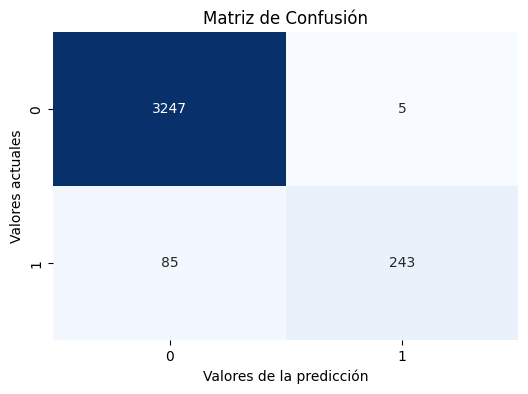

In [65]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_3


            , annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [66]:
metrics_ppn_3 =metricas_matriz_confusion(cm_ppn_3)

In [67]:
print("El valor de exactitud (accuracy) es: " + str(metrics_ppn_3.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ppn_3.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ppn_3.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ppn_3.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ppn_3.especificity))

El valor de exactitud (accuracy) es: 0.9748603351955307
El valor de tasa de error (error_rate) es: 0.025139664804469275
El valor de precisión (precision) es: 0.9798387096774194
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.7408536585365854
El valor de especificidad (especificity) es: 0.9984624846248462


#Adaline 3

In [68]:
ada_3 = AdalineGD(n_iter=2500, eta=0.01)

In [69]:
ada_3.fit(X_train3, y_train3)

<ipython-input-43-bece94a2f872>:66: RuntimeWarning:

invalid value encountered in scalar add



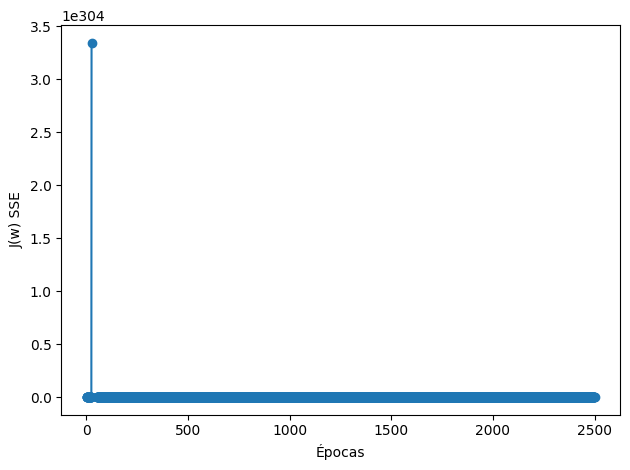

In [70]:
plt.plot(range(1, len(ada_3.cost_) + 1), ada_3.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('J(w) SSE')

plt.tight_layout()

In [71]:
y_predictions_ada_3 = ada_3.predict(X_test3)

In [72]:
# Calcula la matriz de confusión
cm_ada_3 = confusion_matrix(y_test3, y_predictions_ada_3)

print(cm_ada_3)

[[3252    0]
 [ 328    0]]


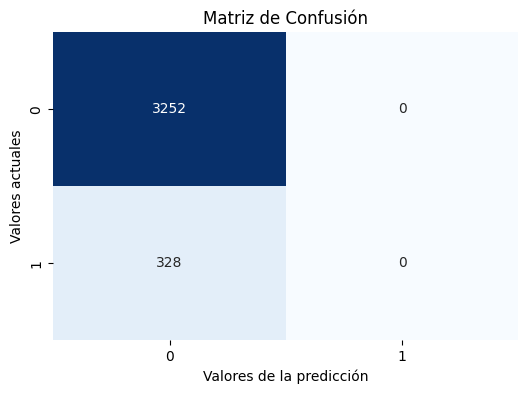

In [73]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada_3, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [74]:
metrics_ada_3 =metricas_matriz_confusion(cm_ada_3)

<ipython-input-63-2e81a57bdfb1>:13: RuntimeWarning:

invalid value encountered in scalar divide



In [75]:
print("El valor de exactitud (accuracy) es: " + str(metrics_ada_3.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ada_3.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ada_3.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ada_3.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ada_3.especificity))

El valor de exactitud (accuracy) es: 0.9083798882681564
El valor de tasa de error (error_rate) es: 0.09162011173184358
El valor de precisión (precision) es: nan
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.0
El valor de especificidad (especificity) es: 1.0
